## Organ transplantation in the United States

Organ transplantation is one of the greatest advances in modern science. It is the last option exercised to save patient's life when all other viable treatment options have failed.

At this moment, about 72,742 patients are waiting for an organ donation in the United States alone.

UNOS provides historical data about organ transplantation dating back to 1988. Using the dataset obtained from UNOS.org, I asked the following questions:

(1) To date, which organ was the most transplanted in **adult patients**?

(2) Over the past 20 years, which organ transplantation showed greatest increase in **adult patients**?

(3) In **pediatric patients**, which organ was the most transplanted to date? 

(4) In **pediatric patients**, which is the most common medical condition underlying the most transplanted organ?

(5) In **pediatric patients**, is the most frequent medical condition  underlying the most transplanted organ equally prevalent in children of all ages?

(6) Comparing **adults** with **pediatric** patients, does the most frequent cause of organ tranplant continue in adults as well?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the datafile obtained from UNOS.

df = pd.read_excel('Transplant_Data.xlsx')

In [3]:
# Data cleanup - dropping the unnamed column. 

df.drop(axis=1, columns = 'Unnamed: 2', inplace = True)

In [4]:
# Data cleanup - renaming the column for ease of typing.

df.rename(columns={'All Recipient Ages': 'Age'}, inplace=True)

#### Age information of patients is not entered in a clear format in the original datafile. Cleaning up and processing data for easier access of age information. 

In [5]:
# Extracting the different age-groups according to which the data is sorted.

age = df['Age']
unique_str = age.unique()
print(unique_str)

[nan '< 1 Year' '1-5 Years' '6-10 Years' '11-17 Years' '18-34 Years'
 '35-49 Years' '50-64 Years' '65 +' 'Unknown']


In [6]:
# Removing the NaN values in the unique age groups.

copy_unique_str = unique_str

for i in range(0, copy_unique_str.shape[0]):
    if np.nan is copy_unique_str[i]:
        unique_str = np.delete(copy_unique_str,i)

print('The different age groups recorded in the data are :{}'.format(str(unique_str)))

The different age groups recorded in the data are :['< 1 Year' '1-5 Years' '6-10 Years' '11-17 Years' '18-34 Years'
 '35-49 Years' '50-64 Years' '65 +' 'Unknown']


In [7]:
# Extracting the index values of the rows where a new age group was first introduced.
unique_str_index = []

for i in range(0, unique_str.shape[0]):
    temp_str_index = age[age.where(age == unique_str[i]).notna()].index[0]
    unique_str_index.append(temp_str_index)
    #print(temp_str_index)

In [8]:
# Creating a new array "arr" which has all rows filled with the index correspondong to the correct age-group.

arr = np.zeros((df.shape[0],1))
count=0

while (count<=len(unique_str_index)-2):
    arr[unique_str_index[count]:unique_str_index[count+1]] = unique_str_index[count]
    count = count + 1
if (count == len(unique_str_index)-1):
    arr[unique_str_index[-1]:] = unique_str_index[-1]



In [9]:
# Creating an array "arr_str" which has age-group (string) for each subject.
# This makes it easier to extract age-wise information as eachc subject has a clear value of age.

arr_str = []

for i in range(0, len(arr)):
    if (arr[i] == 0):
        arr_str.append('Unknown age')
    
    if (arr[i] == 32):
        arr_str.append('< 1 Year')
    
    if (arr[i] == 62):
        arr_str.append('1-5 Years')
    
    if (arr[i] == 94):
        arr_str.append('6-10 Years')
    
    if (arr[i] == 125):
        arr_str.append('11-17 Years')
    
    if (arr[i] == 158):
        arr_str.append('18-34 Years')
    
    if (arr[i] == 191):
        arr_str.append('35-49 Years')
    
    if (arr[i] == 224):
        arr_str.append('50-64 Years')
    
    if (arr[i] == 257):
        arr_str.append('65+ ')
        
    if (arr[i] == 288):
        arr_str.append('Unknown')

In [10]:
# Adding two new columns 'fAge' = actual age group of subject and 'Test_age' to the dataframe.

df['fAge'] = pd.Series(arr_str)

df['Test_age'] = pd.Series(list(arr))

df.drop(columns = 'Age', axis=1, inplace = True)


In [11]:
# Dropping NaN values from the dataframe.

df.dropna(inplace=True)

In [12]:
# Converting integer column names into str type.

columns_name = list(df.columns.astype(str))

df.set_axis(columns_name, axis=1, inplace=True)

Created a new column 'fAge' in the dataframe such that each row in the dataframe has correct age information entered for it.

In [13]:
df['fAge'].unique()

array(['Unknown age', '< 1 Year', '1-5 Years', '6-10 Years',
       '11-17 Years', '18-34 Years', '35-49 Years', '50-64 Years', '65+ ',
       'Unknown'], dtype=object)

The medical condition for which the patient underwent  a transplant is given. Using that information, a new column `df['organ']` is created to describe which was the transplanted organ.

In [14]:
df['organ'] = 'None'

In [15]:
# characterizing all liver transplants in adults.
filt = (df['Diagnosis'] ==  'Acute Hepatic Necrosis') \
        |(df['Diagnosis'] == 'Biliary Atresia') \
        | (df['Diagnosis'] == 'Cholestatic Liver Disease/Cirrhosis') \
        | (df['Diagnosis'] == 'Congenital, Rare, Familial, and Metaboli') \
        | (df['Diagnosis'] == 'Metabolic Disease') \
        | (df['Diagnosis'] == 'Non-Cholestatic Cirrhosis')

df.loc[filt, 'organ'] = 'Liver'

# Characterizing all lung transplants. 
filt = (df['Diagnosis'] == 'Alpha-1 - Antitrypsin Deficiency') \
        | (df['Diagnosis'] == 'Cystic Fibrosis') \
        | (df['Diagnosis'] == 'Emphysema/COPD') \
        | (df['Diagnosis'] == 'Primary Pulmonary Hypertension') \
        | (df['Diagnosis'] == 'Other Lung Disease') \
        | (df['Diagnosis'] == 'Idiopathic Pulmonary Fibrosis')
    
df.loc[filt,'organ'] = 'Lung'

# Characterizing transplants related to cancer diagnosis.
filt = (df['Diagnosis'] == 'Benign Neoplasms') \
       | (df['Diagnosis'] == 'Malignant Neoplasms')\
       | (df['Diagnosis'] == 'Neoplasms') 

df.loc[filt,'organ'] = 'Cancer'

# Characterizing heart transplant.
filt = (df['Diagnosis'] == 'Cardiomyopathy') \
        | (df['Diagnosis'] =='Congenital Heart Disease')\
        | (df['Diagnosis'] == 'Coronary Artery Disease') \
        | (df['Diagnosis'] == 'Other Cardiac Disease') \
        | (df['Diagnosis'] =='Valvular Heart Disease')

df.loc[filt,'organ'] = 'Heart'

# Characterizing pancreas transplant.
filt = df['Diagnosis'] == 'Diabetes'
df.loc[filt,'organ'] = 'Pancreas'

# Characterizing intestinal transplant.
filt = (df['Diagnosis'] == 'Functional Bowel Problems') \
        | (df['Diagnosis'] == 'Short Gut Syndrome')

df.loc[filt,'organ'] = 'Intestine'


# Characterizing kideny transplant.
filt = (df['Diagnosis'] == 'Glomerular Disease')\
      | (df['Diagnosis'] == 'Hypertensive Nephrosclerosis')\
      | (df['Diagnosis'] == 'Tubular and Interstitial Diseases')\
      | (df['Diagnosis'] == 'Polycystic Kidneys') \
      | (df['Diagnosis'] == 'Renovascular and Other Vascular Disease')

df.loc[filt,'organ'] = 'Kidney'

# Important to identify graft failures - that is assigned a unique category of its own.
filt = df['Diagnosis'] == 'Retransplant/Graft Failure'
df.loc[filt,'organ'] = 'Graft failure'

# Characterizing transplants whose organs not reported.
filt = (df['Diagnosis'] == 'Not Reported') \
       | (df['Diagnosis'] == 'Other')

df.loc[filt,'organ'] = 'Other'

In [16]:
# Extracting adult subjects' data.
filt = (df['fAge'] == '18-34 Years') | (df['fAge'] == '35-49 Years') | (df['fAge']=='50-64 Years') | (df['fAge']=='65+')
adult = df[filt]

In [17]:
# Aggregating transplants in adults by the organ.

adult_organ = adult.groupby('organ').agg(total=('To Date','sum'))

In [18]:
# Dropping irrelevant rows that do not correspond to any specific organ/diangosis.

adult_organ.drop(labels='None', axis=0, inplace=True)

### 1. Which was the most common transplant in adult patients?

[Text(0, 0, 'Cancer'),
 Text(0, 0, 'Graft failure'),
 Text(0, 0, 'Heart'),
 Text(0, 0, 'Intestine'),
 Text(0, 0, 'Kidney'),
 Text(0, 0, 'Liver'),
 Text(0, 0, 'Lung'),
 Text(0, 0, 'Other'),
 Text(0, 0, 'Pancreas')]

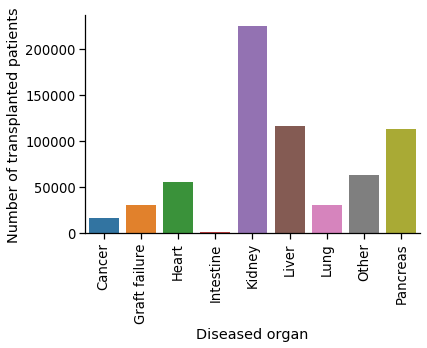

In [19]:
# Plotting the diseased organ diagnosis underlying adult transplants.

sns.set_context(context = 'notebook', font_scale = 1.2)

ax = sns.barplot(x=adult_organ.index, y='total', data=adult_organ )

sns.despine()

ax.set(xlabel='Diseased organ', ylabel='Number of transplanted patients')


ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


### Answer 1: Adult patients had the most number kidney transplants, followed by liver and pancreas transplant. 

### 2. Given medical advancements, how has the frequency of top 3 transplants increased over time?

In [20]:
# Extracting all kidney-related data.

kidney_chron = (adult[adult['organ'] == 'Kidney'].drop(columns=['Diagnosis','To Date','2020','fAge','Test_age','organ']))

# Extracting all liver-related data.

liver_chron = (adult[adult['organ'] == 'Liver'].drop(columns=['Diagnosis','To Date','2020','fAge','Test_age','organ']))

# Extracting all pancreas-related data.

pancreas_chron = (adult[adult['organ'] == 'Pancreas'].drop(columns=['Diagnosis','To Date','2020','fAge','Test_age','organ']))



In [21]:
# Creating a series for each organ chronology.

kid_series = pd.Series(data =kidney_chron.sum(axis=0) , index=kidney_chron.sum(axis=0).index, name='kidney' )

liv_series = pd.Series(data =liver_chron.sum(axis=0), index=liver_chron.sum(axis=0).index, name='liver')

panc_series = pd.Series(data = pancreas_chron.sum(axis=0), index=pancreas_chron.sum(axis=0).index, name='pancreas')

# Concatenating into a composite dataframe for cleaner plotting.

organwise_chron = pd.concat([kid_series, liv_series, panc_series], axis=1)
organwise_chron['year'] = organwise_chron.index

organwise_chron.sort_values(by='year', axis=0, ascending=True, inplace=True)

Text(0, 0.5, 'Number of organ transplants')

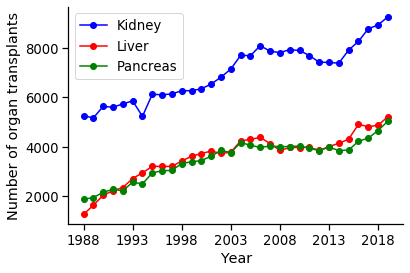

In [22]:
sns.set_style()

ax = plt.plot()

plt.plot(organwise_chron['year'], organwise_chron['kidney'], color='blue', marker='o',label='Kidney')

plt.plot(organwise_chron['year'], organwise_chron['liver'], color='red', marker='o', label='Liver')

plt.plot(organwise_chron['year'], organwise_chron['pancreas'], color='green', marker='o',label='Pancreas')

plt.legend(['Kidney','Liver','Pancreas'],)

sns.despine()

plt.xticks([0,5,10,15,20,25,30])

plt.xlabel('Year')

plt.ylabel('Number of organ transplants')


In [23]:
# Calculating % increase in 20 years.

increase_kidney = 100*((organwise_chron.loc['2019','kidney'] - organwise_chron.loc['1988','kidney'])/organwise_chron.loc['1988','kidney'])

increase_liver = 100*( (organwise_chron.loc['2019','liver'] - organwise_chron.loc['1988','liver'])/organwise_chron.loc['1988','liver'])

increase_pancreas = 100*( (organwise_chron.loc['2019','pancreas'] - organwise_chron.loc['1988','pancreas'])/organwise_chron.loc['1988','pancreas'])

Text(0, 0.5, '% increase in 20 years')

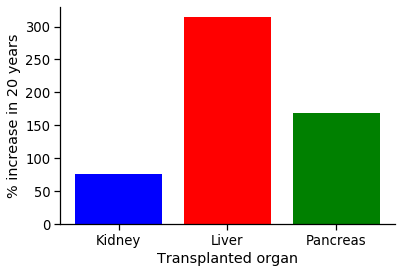

In [24]:
plt.bar('Kidney', increase_kidney, color='blue')

plt.bar('Liver', increase_liver, color='red')

plt.bar('Pancreas', increase_pancreas, color='green')

sns.set_context(context='notebook', font_scale = 1.2)

sns.despine()

plt.xlabel('Transplanted organ')

plt.ylabel('% increase in 20 years')


### Answer 2: Over the past 20 years, the number of liver transplants underwent the most dramatic increase, followed by pancreas and kidney transplants.

## Examining pediatric patient data.

### 3. What is the most common transplanted organ in children to date?

In [25]:
# Extracting pediatric subjects' data.

filt = (df['fAge'] == '< 1 Year') | (df['fAge']=='1-5 Years') | (df['fAge']=='6-10 Years') | (df['fAge']=='11-17 Years')

pediatric = df[filt]


In [26]:
# Calculating the number of pediatric transplants happened to date.

pediatric_organ = pediatric.groupby('organ').agg(total=('To Date','sum'))

pediatric_organ.drop(labels='None', axis=0, inplace=True)

[Text(0, 0, 'Cancer'),
 Text(0, 0, 'Graft failure'),
 Text(0, 0, 'Heart'),
 Text(0, 0, 'Intestine'),
 Text(0, 0, 'Kidney'),
 Text(0, 0, 'Liver'),
 Text(0, 0, 'Lung'),
 Text(0, 0, 'Other'),
 Text(0, 0, 'Pancreas')]

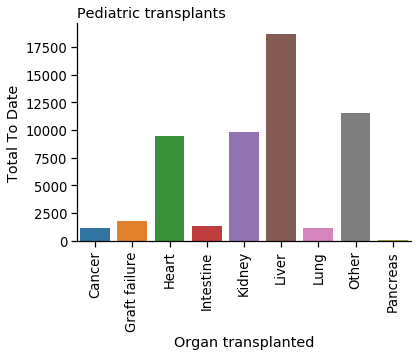

In [27]:
ax = sns.barplot(x=pediatric_organ.index, y='total', data=pediatric_organ)

plt.xlabel('Organ transplanted')
plt.ylabel('Total To Date')
sns.despine()
sns.set_context(context='notebook',font_scale = 1.2)
ax.set_title('Pediatric transplants', loc='left')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

### Answer 3: Liver transplants are the most transplanted organs in pediatric patients. 

### 4: What is the most frequent medical condition that requires liver transplantation in children?

Text(0, 0.5, 'To Date total liver transplants')

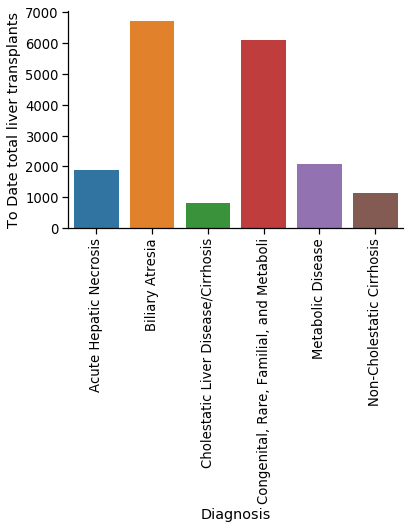

In [28]:
# Most common condition necessitating liver transplant in kids.

ped_liver = pediatric.loc[pediatric['organ'] == 'Liver', :]

diagnosis_ped_liver = ped_liver.groupby('Diagnosis').agg(total=('To Date','sum'))

ax3 = sns.barplot(x=diagnosis_ped_liver.index, y='total',data=diagnosis_ped_liver)

sns.set_context(context='notebook',font_scale = 1.2)

sns.despine()

ax3.set_xticklabels(ax3.get_xticklabels(), rotation = 90)

plt.xlabel('Diagnosis')

plt.ylabel('To Date total liver transplants')

### Answer 4: Biliary atresia is the most common cause for liver transplantation in children.

### Question 5: How is liver transplant necessitated by biliary atresia spread across children of different ages? 

In [29]:
# Extracting biliary Atresia diagnosis for patients less than 1 year old.

filt = (ped_liver['Diagnosis'] == 'Biliary Atresia') & (ped_liver['fAge'] == '< 1 Year')
temp_df = ped_liver[filt]
temp_df.drop(columns=['Diagnosis','To Date','2020','fAge','Test_age','organ'],inplace=True)

x = np.zeros((temp_df.columns.shape[0],2))
x[:,0] = temp_df.columns
x[:,1] = temp_df.values

ba_less1year = pd.Series(data=x[:,1], index=x[:,0])
ba_less1year.sort_index(axis=0, inplace=True)

C:\Users\D\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [30]:
# Extracting biliary atresia diagnosis in patients between 1 and 5 years age.

filt = (ped_liver['Diagnosis'] == 'Biliary Atresia') & (ped_liver['fAge'] == '1-5 Years')
temp_df = ped_liver[filt]
temp_df.drop(columns=['Diagnosis','To Date','2020','fAge','Test_age','organ'], inplace=True)

x = np.zeros((temp_df.columns.shape[0],2))
x[:,0] = temp_df.columns
x[:,1] = temp_df.values

ba_1to5years = pd.Series(data=x[:,1], index=x[:,0])
ba_1to5years.sort_index(axis=0, inplace=True)


In [31]:
# Extracting biliary atresia information in pateints between age 6 and 10 years.

filt = (ped_liver['Diagnosis'] == 'Biliary Atresia') & (ped_liver['fAge'] == '6-10 Years')
temp_df = ped_liver[filt]
temp_df.drop(columns=['Diagnosis','To Date','2020','fAge','Test_age','organ'], inplace=True)

x = np.zeros((temp_df.columns.shape[0],2))
x[:,0] = temp_df.columns
x[:,1] = temp_df.values

ba_6to10years = pd.Series(data=x[:,1], index=x[:,0])
ba_6to10years.sort_index(axis=0, inplace=True)

In [32]:
# Extracting biliary atresia information in ages 11 and 17 years.

filt = (ped_liver['Diagnosis'] == 'Biliary Atresia') & (ped_liver['fAge'] == '11-17 Years')
temp_df = ped_liver[filt]
temp_df.drop(columns=['Diagnosis','To Date','2020','fAge','Test_age','organ'],inplace=True)

x = np.zeros((temp_df.columns.shape[0],2))
x[:,0] = temp_df.columns
x[:,1] = temp_df.values

ba_11to17years = pd.Series(data=x[:,1], index=x[:,0])
ba_11to17years.sort_index(axis=0, inplace=True)

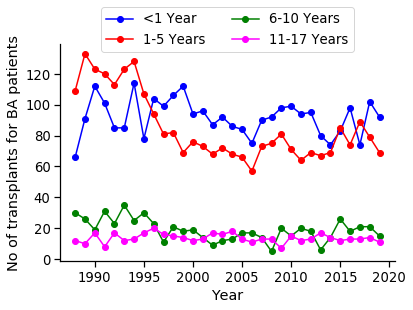

In [33]:
plt.plot(ba_less1year.index, ba_less1year, color='blue', marker='o', label='< 1 year')

plt.plot(ba_1to5years.index, ba_1to5years, color='red', marker='o', label = '1-5 years')

plt.plot(ba_6to10years.index, ba_6to10years, color='green', marker='o', label='6-10 years')

plt.plot(ba_11to17years.index, ba_11to17years, color='magenta', marker='o', label='11-17 years')

plt.xlabel('Year')
plt.ylabel('No of transplants for BA patients')
sns.set_context(context='notebook',font_scale=1.2)
sns.despine()
plt.legend(['<1 Year','1-5 Years','6-10 Years','11-17 Years'],loc='upper center', bbox_to_anchor = (0.5,1.2), ncol = 2)

### Answer 5: Majority of liver transplants in pediatric patients occur before the child turns 6 years old. 

### 6. Biliary atresia is the most common reason for liver transplantion in children. Is it the major cause of liver transplantation in adults too?

In [34]:
# All pediatric patients who received transplant because of BA.

filt1 = (df['Diagnosis'] == 'Biliary Atresia') & (df['fAge'] == '< 1 Year') 

filt2 = (df['Diagnosis'] == 'Biliary Atresia') & (df['fAge'] == '1-5 Years')

filt3 = (df['Diagnosis'] == 'Biliary Atresia') & (df['fAge'] == '6-10 Years')

filt4 = (df['Diagnosis'] == 'Biliary Atresia') & (df['fAge'] == '11-17 Years')

#df[filt1 | filt2 | filt3 | filt4].drop(columns=['Diagnosis','To Date','2020','fAge','Test_age','organ'])

ped_ba = df[filt1 | filt2 | filt3 | filt4].sum(axis=0)

ped_ba.drop(index=['Diagnosis','To Date','2020','fAge','Test_age','organ'], inplace = True)

ped_ba.sort_index(axis=0, inplace=True)

In [35]:
# Extracting information on the adult patients who received liver transplant 
# because of "Biliary Atresia"

filt1 = (df['Diagnosis'] == 'Biliary Atresia') & (df['fAge'] == '18-34 Years')

filt2 = (df['Diagnosis'] == 'Biliary Atresia') & (df['fAge'] == '35-49 Years')

filt3 = (df['Diagnosis'] == 'Biliary Atresia') & (df['fAge'] == '50-64 Years')

filt4 = (df['Diagnosis'] == 'Biliary Atresia') & (df['fAge'] == '65+')

adult_ba = df[filt1 | filt2 | filt3 | filt4].sum(axis=0)

adult_ba.drop(index=['Diagnosis','To Date','2020','fAge','Test_age','organ'], inplace=True)

adult_ba.sort_index(axis=0, inplace = True)

Text(0, 0.5, 'Number of Liver transplants')

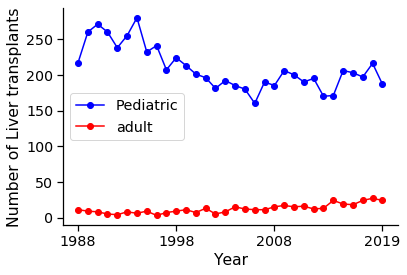

In [36]:
sns.set_style()
sns.set_context(context='notebook',font_scale=1.3)
plt.plot(ped_ba.index, ped_ba, marker='o',color='blue')

plt.xticks((0,10,20,31),('1988','1998','2008','2019'))

plt.plot(adult_ba.index, adult_ba, marker='o',color='red')

plt.legend(['Pediatric','adult'], loc='center left')
sns.despine()

plt.xlabel('Year')
plt.ylabel('Number of Liver transplants')

### Answer 6: Liver transplantation due to biliary atresia is much much more common  in Pediatric patients. The number of adult liver transplants due to Biliary Atresia is just about 11% of the similar number for pediatric patients.